In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#importing clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 

Problem-1)
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Basic & EDA

In [ ]:
crime.rename(columns={'Unnamed: 0':'state'}, inplace=True)
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
#null values
crime.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

no null values

In [ ]:
#duplicate data
crime.duplicated().value_counts()

False    50
dtype: int64

no duplicate in data

Visualizing the datapoints 

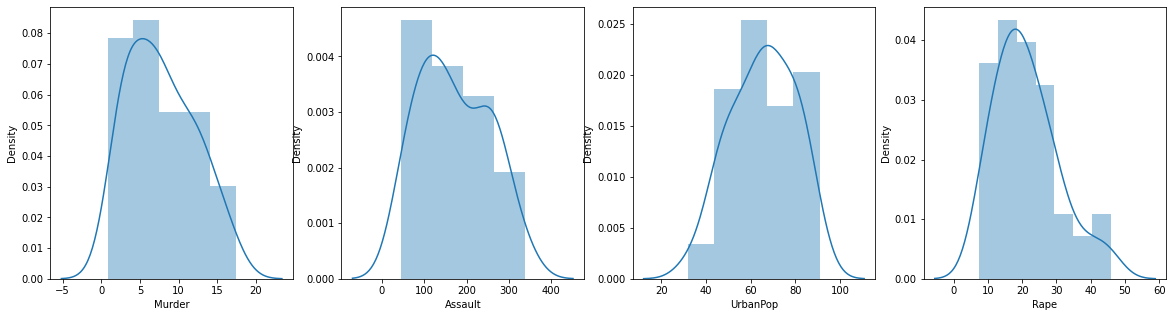

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(20,5))
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
  plt.subplot(1,4,i)
  sns.distplot(crime[column])

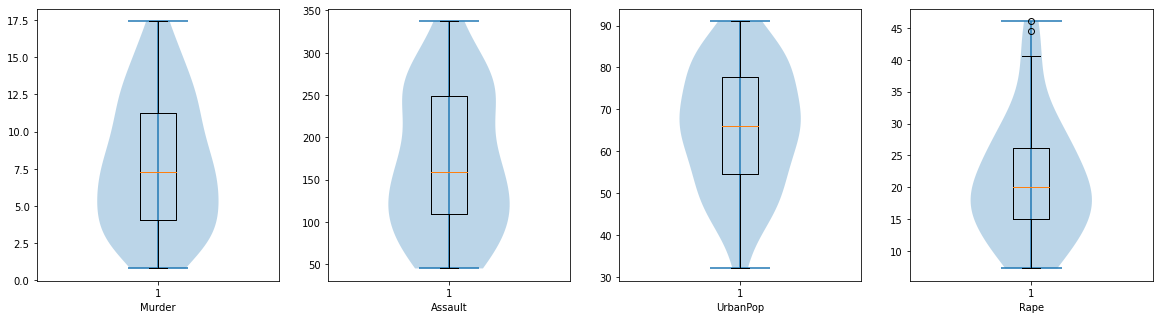

In [ ]:
#plotting boxplot 
plt.figure(figsize=(20,5))
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
  plt.subplot(1,4,i)
  plt.violinplot(crime[column])
  plt.boxplot(crime[column])
  plt.xlabel(crime[column].name)

There are no outliers in features except rape feature in data in the data set

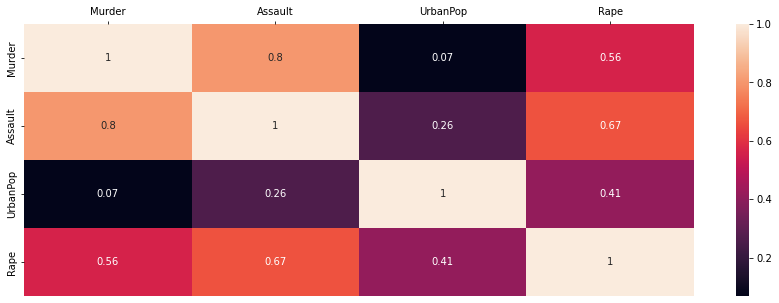

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(crime.corr(),annot=True)
ax.xaxis.tick_top()

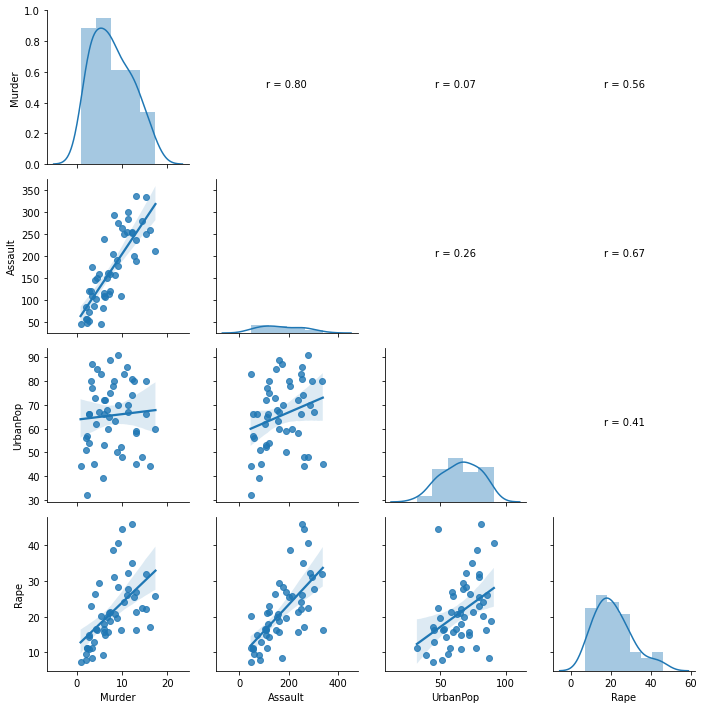

In [ ]:
#creating pairgrid with correlation coefficents
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
  ax = plt.gca()
  r,p = pearsonr(x,y)
  ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
  ax.set_axis_off()


g = sns.PairGrid(crime)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

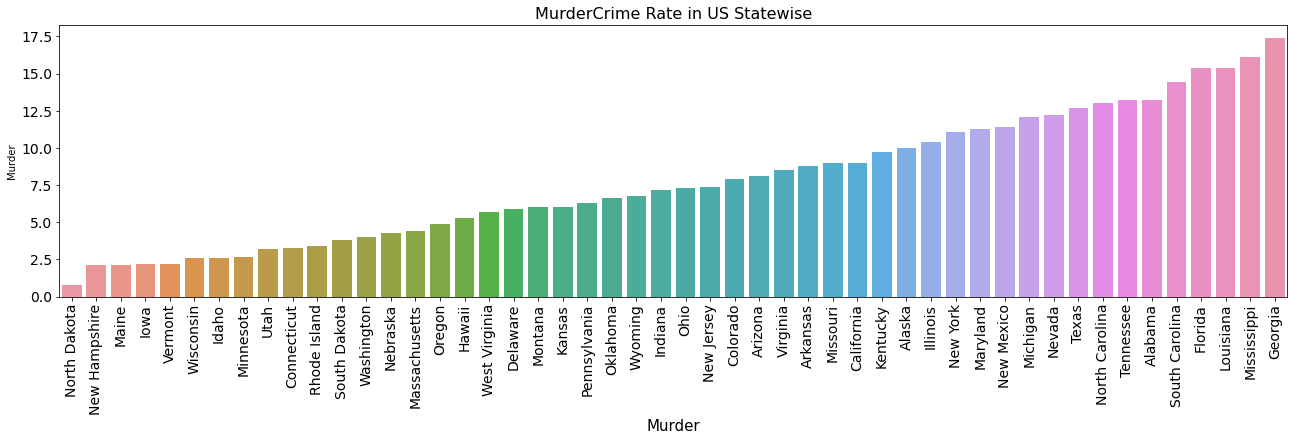

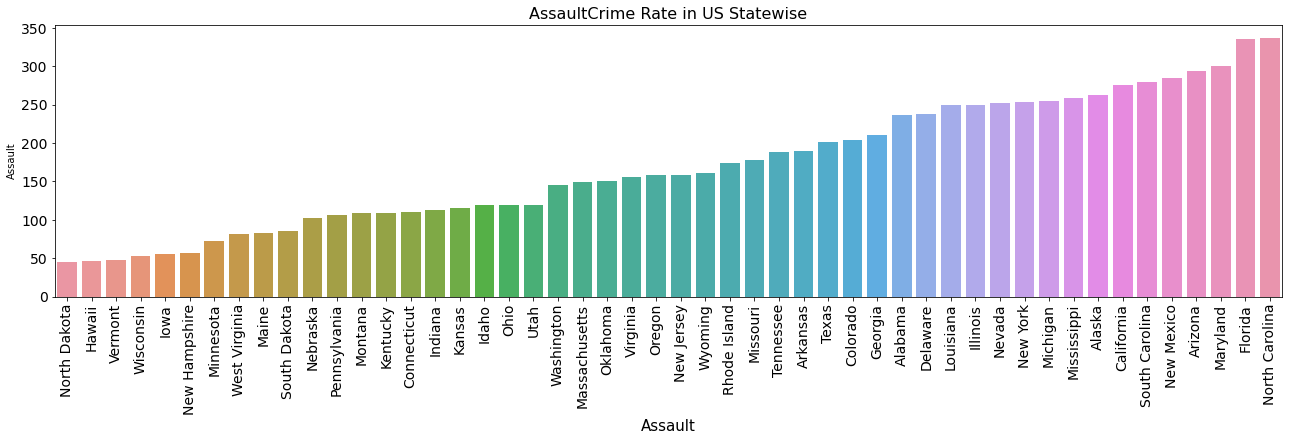

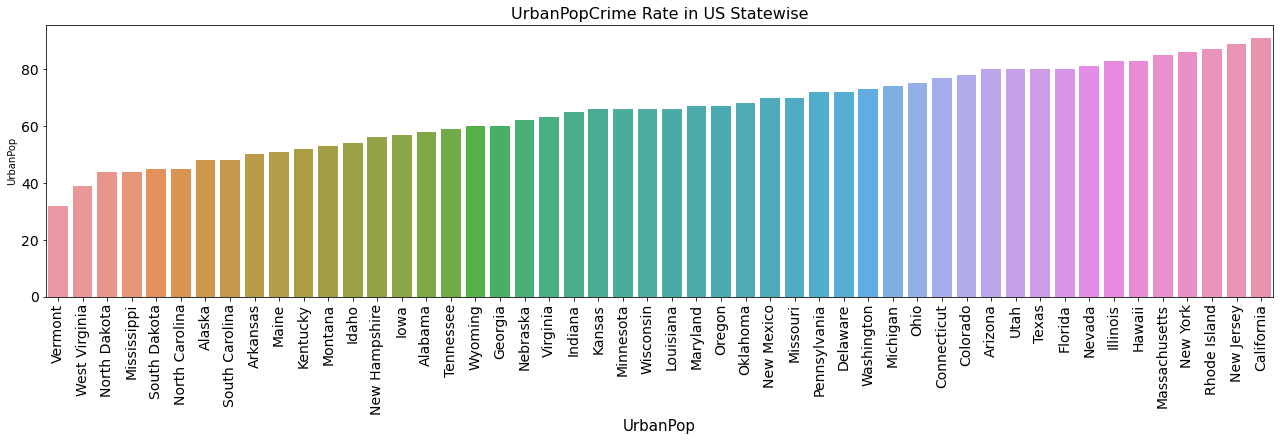

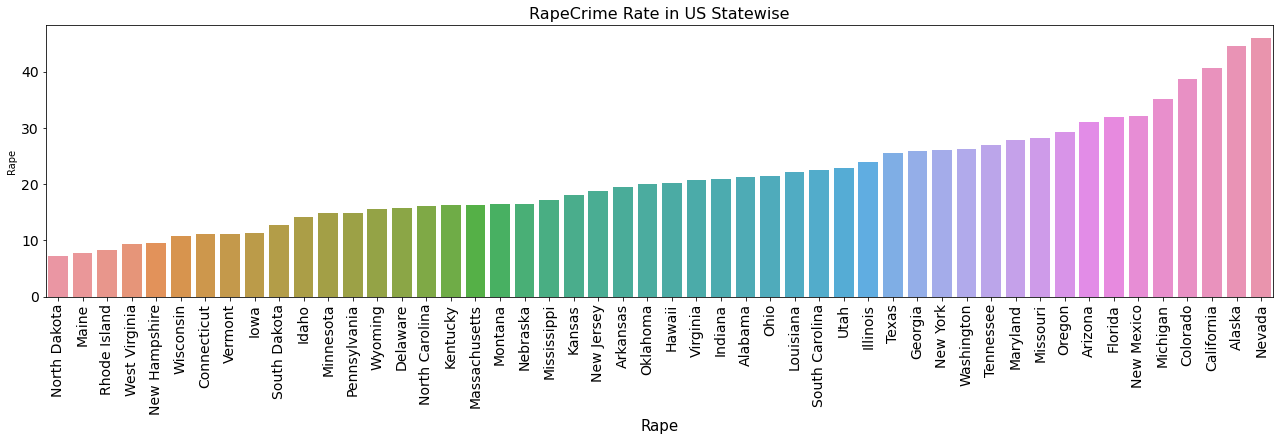

In [ ]:
 #barplot and sorted bars
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
  plt.figure(figsize=(22,5))
  sns.barplot(x='state', y=column, data=crime, order=crime.sort_values(column).state)
  plt.xlabel("State",size=15)
  plt.xlabel(crime[column].name)
  plt.yticks(rotation = 0,fontsize = 14)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.title(crime[column].name + "Crime Rate in US Statewise",size=16)
  plt.show()


Standardisation

In [ ]:
#Standardisation of function 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])
crime_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#silhouette_score
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(crime_scaled)
        silhouette_score1 = silhouette_score(crime_scaled, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

Hierarchical Clustering

In [ ]:
#dendogram

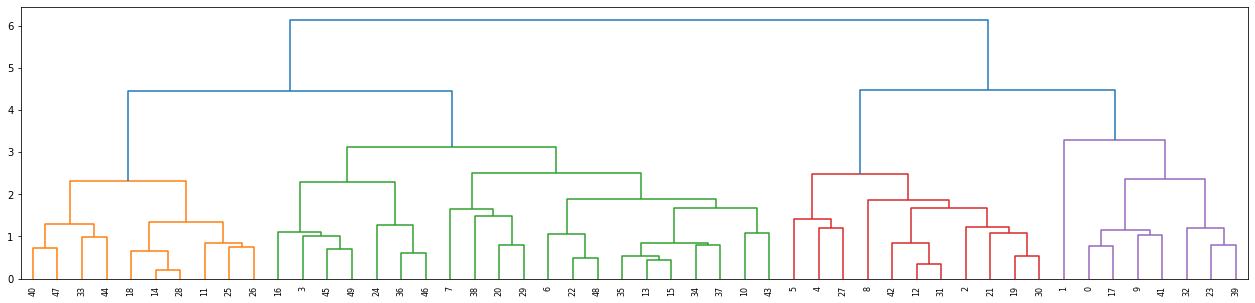

In [ ]:
plt.figure(figsize=(22,5))
dendrogram = sch.dendrogram(sch.linkage(crime_scaled,method='complete'))

K-Means method:

In [ ]:
#creating cluster
hc = AgglomerativeClustering(n_clusters=4,affinity='enclidean',linkage='complete')

In [ ]:
clusters_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for stadardScaler applied on data.

for n_clusters in clusters_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(crime_scaled)
    sil_score1= silhouette_score(crime_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


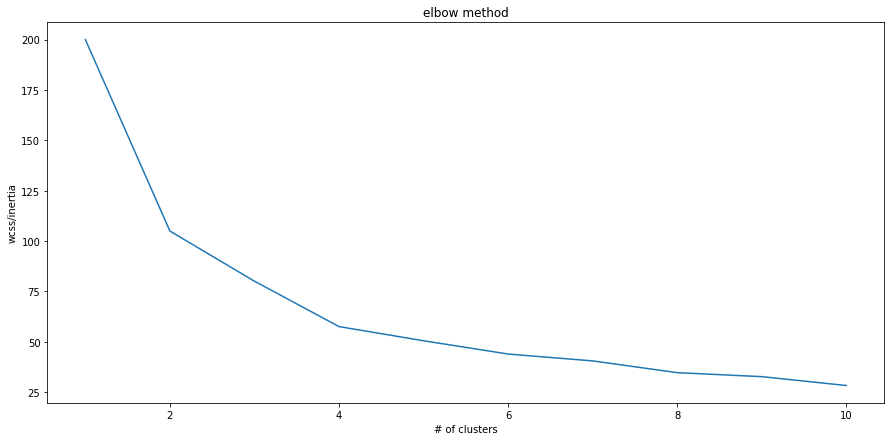

In [ ]:
#elbow method for k value
plt.figure(figsize=(15,7))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('# of clusters')
plt.ylabel('wcss/inertia')
plt.show()
     

4 clusters will be a better choice as per above methods

In [ ]:
#build cluster algorithm
from sklearn.cluster import KMeans 
cluster_new=KMeans(4, random_state=42)
cluster_new.fit(crime_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
cluster_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
crime_kmeans=crime.copy()
crime_kmeans['kmeans_clusterid'] = cluster_new.labels_
crime_kmeans.head()


,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [ ]:
crime_kmeans['kmeans_clusterid'].value_counts()

0    16
2    13
3    13
1     8
Name: kmeans_clusterid, dtype: int64

In [ ]:
#these are standardized values.
cluster_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [ ]:
crime_kmeans.groupby('kmeans_clusterid').agg(['mean']).reset_index()

,kmeans_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==0]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==1]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==2]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==3]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(crime_scaled)
pca_2d = pca.transform(crime_scaled)


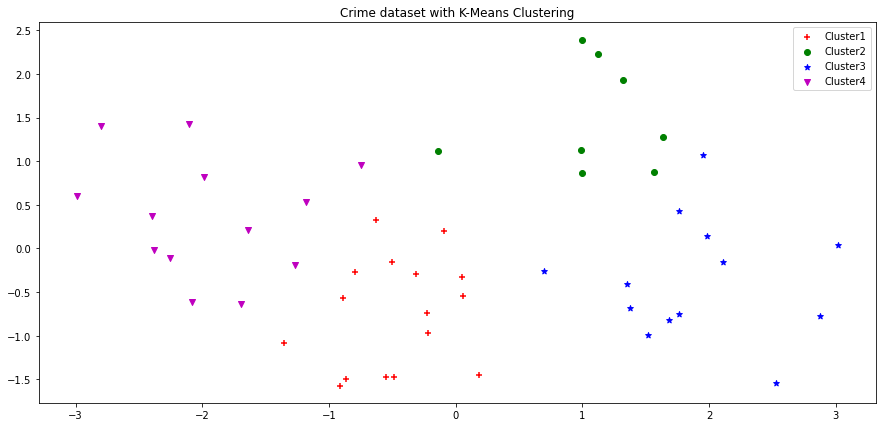

In [ ]:
import pylab as pl
plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if crime_kmeans.kmeans_clusterid[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_kmeans.kmeans_clusterid[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_kmeans.kmeans_clusterid[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif crime_kmeans.kmeans_clusterid[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with K-Means Clustering')
pl.show()

DBSCAN method

In [ ]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit_predict(crime_scaled)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
crime_dbscan=crime.copy()
crime_dbscan['dbscan_clusterid'] = dbscan.labels_
crime_dbscan['dbscan_clusterid'].value_counts()

 1    28
-1    18
 0     4
Name: dbscan_clusterid, dtype: int64

In [ ]:
crime_dbscan.groupby('dbscan_clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
dbscan_clusterid,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==-1]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1
12,Illinois,10.4,249,83,24.0,-1


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==0]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==1]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [ ]:
#visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca=PCA(n_components=2).fit(crime_scaled)
pca_2d = pca.transform(crime_scaled)

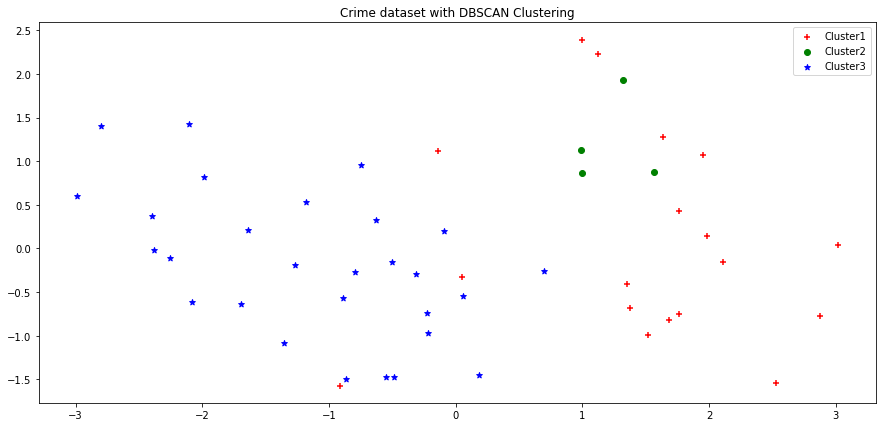

In [ ]:
import pylab as pl
plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if crime_dbscan.dbscan_clusterid[i] == -1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_dbscan.dbscan_clusterid[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_dbscan.dbscan_clusterid[i] == 1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3'])
pl.title('Crime dataset with DBSCAN Clustering')
pl.show()

Conclusion:
In each cluster method, the second cluster has more points when compared to the other clusters.

The clustering methods, hierarchical and K-means, almost grouped the similar points into the same cluster.

DBSCAN clustering performance is low when compared with k-means and hierarchical methods. because it is not placing all points of the cluster in one place for the gievn dataset.